# importing needed libraries

In [1]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15716 sha256=67fd07e04a302b2b5fb094d722a94d5af34c131aa82918369c48aec21dd0973f
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.1

In [2]:
!pip install contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import string
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from googletrans import Translator, constants
import os
from tqdm import tqdm
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import contractions
from bs4 import BeautifulSoup
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt

# importing our dataset

In [4]:
train_data = pd.read_excel('/kaggle/input/book-price-prediction-cs-sbu/Data_Train.xlsx', engine='openpyxl')
test_data = pd.read_excel('/kaggle/input/book-price-prediction-cs-sbu/test.xlsx', engine='openpyxl')

In [5]:
train_data['Set'] = 'train'
test_data['Set'] = 'test'

train_data = pd.concat([train_data, test_data])
train_data = train_data.reset_index(drop=True)


In [6]:
X_test_org = train_data[train_data['Set'] == 'test']
X_test_org.shape

(537, 11)

# Univariate Variable Analysis

In [7]:
train_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Set,Unnamed: 0
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,train,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,train,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6231,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,NaN,test,532.0
6232,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",NaN,test,533.0
6233,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,NaN,test,534.0
6234,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,NaN,test,535.0


In [8]:
train_data.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Set', 'Unnamed: 0'],
      dtype='object')

In [9]:
 train_data.nunique()

Title           5567
Author          3678
Edition         3370
Reviews           36
Ratings          342
Synopsis        5548
Genre            345
BookCategory      11
Price           1538
Set                2
Unnamed: 0       537
dtype: int64

In [10]:
train_data.Title   

0                     The Prisoner's Gold (The Hunters 3)
1                      Guru Dutt: A Tragedy in Three Acts
2                            Leviathan (Penguin Classics)
3                      A Pocket Full of Rye (Miss Marple)
4              LIFE 70 Years of Extraordinary Photography
                              ...                        
6231    Humans: A Brief History of How We F*cked It Al...
6232                                          The Chemist
6233    The Duke And I: Number 1 in series (Bridgerton...
6234                         Frostfire (Kanin Chronicles)
6235                          The First Order (Sam Capra)
Name: Title, Length: 6236, dtype: object

In [11]:
train_data.Author

0        Chris Kuzneski
1          Arun Khopkar
2         Thomas Hobbes
3       Agatha Christie
4       Editors of Life
             ...       
6231       Tom Phillips
6232    Stephenie Meyer
6233        Julia Quinn
6234     Amanda Hocking
6235        Jeff Abbott
Name: Author, Length: 6236, dtype: object

In [12]:
train_data.Edition   

0       Paperback,– 10 Mar 2016
1        Paperback,– 7 Nov 2012
2       Paperback,– 25 Feb 1982
3        Paperback,– 5 Oct 2017
4       Hardcover,– 10 Oct 2006
                 ...           
6231     Paperback,– 8 Aug 2018
6232    Paperback,– 21 Nov 2016
6233     Paperback,– 8 Jun 2006
6234    Paperback,– 15 Jan 2015
6235    Paperback,– 21 Dec 2016
Name: Edition, Length: 6236, dtype: object

In [13]:
train_data.Reviews

0       4.0 out of 5 stars
1       3.9 out of 5 stars
2       4.8 out of 5 stars
3       4.1 out of 5 stars
4       5.0 out of 5 stars
               ...        
6231    5.0 out of 5 stars
6232    3.3 out of 5 stars
6233    3.8 out of 5 stars
6234    3.5 out of 5 stars
6235    3.9 out of 5 stars
Name: Reviews, Length: 6236, dtype: object

In [14]:
train_data.Ratings 

0        8 customer reviews
1       14 customer reviews
2        6 customer reviews
3       13 customer reviews
4         1 customer review
               ...         
6231     2 customer reviews
6232     9 customer reviews
6233     3 customer reviews
6234     4 customer reviews
6235     2 customer reviews
Name: Ratings, Length: 6236, dtype: object

In [15]:
train_data.BookCategory.unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [16]:
train_data.BookCategory[45]

'Sports'

In [17]:
train_data.Synopsis  # \n

0       THE HUNTERS return in their third brilliant no...
1       A layered portrait of a troubled genius for wh...
2       "During the time men live without a common Pow...
3       A handful of grain is found in the pocket of a...
4       For seven decades, "Life" has been thrilling t...
                              ...                        
6231    'F*cking brilliant' Sarah Knight\n'Very funny'...
6232    In this gripping page-turner, an ex-agent on t...
6233    'The most refreshing and radiant love story yo...
6234    Frostfire by Amanda Hocking is the stunning fi...
6235    Six years ago, Sam Capra watched his brother, ...
Name: Synopsis, Length: 6236, dtype: object

In [18]:
train_data.Synopsis[56]

'The first time Veer set his eyes on Maia, he felt such an intense attraction that he was swept away by the magic. Strangely, Maia felt it too. Soon it became their lives. It was as if the only reality was this inexplicable force that drew them together.\nHowever, just like the whirlwind that it was, it tore them apart. A tragedy caught them unawares and jolted them out of their stupor. What it left in its wake was hatred—as potent as their love. Things did not end there. Several years later, fate played its dirty trick again and brought them face to face.\nThis time the choice was theirs: to let their hatred destroy them or to give love another chance.'

In [19]:
train_data.Genre

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6231            Anthropology (Books)
6232    Contemporary Fiction (Books)
6233                 Romance (Books)
6234      Action & Adventure (Books)
6235      Action & Adventure (Books)
Name: Genre, Length: 6236, dtype: object

In [20]:
train_data.Genre[900]

'International Relations'

In [21]:
train_data.BookCategory[:11]

0                       Action & Adventure
1     Biographies, Diaries & True Accounts
2                                   Humour
3                Crime, Thriller & Mystery
4                 Arts, Film & Photography
5                                   Sports
6                Crime, Thriller & Mystery
7                                   Sports
8     Biographies, Diaries & True Accounts
9                       Action & Adventure
10         Language, Linguistics & Writing
Name: BookCategory, dtype: object

In [22]:
train_data.describe()

,Price,Unnamed: 0
count,5699.000000,537.000000
mean,554.857428,268.000000
std,674.363427,155.162818
min,25.000000,0.000000
25%,249.000000,134.000000
50%,373.000000,268.000000
75%,599.000000,402.000000
max,14100.000000,536.000000


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6236 non-null   object 
 1   Author        6236 non-null   object 
 2   Edition       6236 non-null   object 
 3   Reviews       6236 non-null   object 
 4   Ratings       6236 non-null   object 
 5   Synopsis      6236 non-null   object 
 6   Genre         6236 non-null   object 
 7   BookCategory  6236 non-null   object 
 8   Price         5699 non-null   float64
 9   Set           6236 non-null   object 
 10  Unnamed: 0    537 non-null    float64
dtypes: float64(2), object(9)
memory usage: 536.0+ KB


# Feature Engineering & Transformation

### Authors Analysis

books with multiple authors

In [24]:
train_data['Authors_List'] = train_data['Author'].str.split(', ')

train_data['Num_Authors'] = train_data['Authors_List'].apply(lambda x: len(x))

books_with_multiple_authors = train_data[train_data['Num_Authors'] > 1]

print("Books with multiple authors:")
books_with_multiple_authors[['Title', 'Author', 'Num_Authors']]

Books with multiple authors:


,Title,Author,Num_Authors
11,Blockchain Revolution: How the Technology Behi...,"Don Tapscott, Alex Tapscott",2
16,My First Book of London,"Charlotte Guillain, Roland Dry",2
19,"Introducing Data Science: Big Data, Machine Le...","Davy Cielen, Arno D.B. Meysman, Mohamed Ali",3
29,"Memories, Dreams, Reflections (Vintage)","C. G. Jung, Aniela Jaffe, Clara Winston, Richa...",4
31,The Archer Files: The Complete Short Stories o...,"Ross Macdonald, Tom Nolan",2
...,...,...,...
6120,101 Youth Football Coaching Sessions (101 Drills),"Tony Charles, Stuart Rook",2
6135,Asterix and Caesar's Gift: Album 21,"René Goscinny, Albert Uderzo",2
6162,Shooter's Bible: The World's Standard Firearms...,"Jay Langston, Wayne Van Zwoll",2
6187,The Elements of Style,"William Strunk Jr., E. B. White",2


In [25]:
books_with_multiple_authors[['Title', 'Author', 'Num_Authors']][:9]

,Title,Author,Num_Authors
11,Blockchain Revolution: How the Technology Behi...,"Don Tapscott, Alex Tapscott",2
16,My First Book of London,"Charlotte Guillain, Roland Dry",2
19,"Introducing Data Science: Big Data, Machine Le...","Davy Cielen, Arno D.B. Meysman, Mohamed Ali",3
29,"Memories, Dreams, Reflections (Vintage)","C. G. Jung, Aniela Jaffe, Clara Winston, Richa...",4
31,The Archer Files: The Complete Short Stories o...,"Ross Macdonald, Tom Nolan",2
71,A Doll's House and Other Plays (Penguin Classics),"Henrik Ibsen, Deborah Dawkin, Erik Skuggevik, ...",4
77,Art: A World History,"Elke Linda Buchholz, Susanne Kaeppele, Karolin...",5
80,Batman Eternal Vol. 2 (The New 52) (Batman Ete...,"Scott Snyder, Tim Seeley, Jason Fabok",3
89,The Tatas: How a Family Built a Business and a...,"Girish Kuber, Vikrant Pande",2


In [26]:
def get_punctuation(s):
    return ''.join(char for char in s if char in string.punctuation)

train_data['punctuation_chars'] = train_data['Author'].apply(get_punctuation)
authors_with_punctuation = train_data[train_data['punctuation_chars'] != '']

print("Authors with punctuation in their names:")
authors_with_punctuation[['Title', 'Author', 'punctuation_chars']]




Authors with punctuation in their names:


,Title,Author,punctuation_chars
11,Blockchain Revolution: How the Technology Behi...,"Don Tapscott, Alex Tapscott",","
16,My First Book of London,"Charlotte Guillain, Roland Dry",","
19,"Introducing Data Science: Big Data, Machine Le...","Davy Cielen, Arno D.B. Meysman, Mohamed Ali",",..,"
29,"Memories, Dreams, Reflections (Vintage)","C. G. Jung, Aniela Jaffe, Clara Winston, Richa...","..,,,"
31,The Archer Files: The Complete Short Stories o...,"Ross Macdonald, Tom Nolan",","
...,...,...,...
6187,The Elements of Style,"William Strunk Jr., E. B. White",".,.."
6200,"The Horse, the Wheel, and Language – How Bronz...",David W. Anthony,.
6206,A Shot at History: My Obsessive Journey to Oly...,"Abhinav Bindra, Rohit Brijnath",","
6216,The Psychology Book (Big Ideas),D.K.,..


In [27]:
authors_with_punctuation['punctuation_chars'].unique()

array([',', ',..,', '..,,,', '.', '-', ',,,', ',,,,', ',,', '..', '&',
       '.,..', "'", '...', '.,,', '.,', '..,', '-.', '/', ',.', '()',
       ',.,.', ',..', '...,', '-,', "''", '-,,', '..,.', '-,.', ',,.',
       '.,.', ',,,,...', '..,,', ';;', ",'", '..,..', ",,,',", '-,-,',
       '//', ',()', ",,'", '&,', '&()', '..;', ',..,.', '.,.,..,.', "',,",
       '..,..,..', ';', '-,,,', '.,.,', '..,.,..', '.-', '..,..,..,',
       ',.....,.', '(&)', "'!"], dtype=object)

In [28]:
punctuations_to_remove = ['(',')','!',"'",'.']

In [29]:
train_data['Author'] = train_data['Author'].apply(lambda x: ''.join(char for char in x if char not in punctuations_to_remove))
# test_data['Author'] = test_data['Author'].apply(lambda x: ''.join(char for char in x if char not in punctuations_to_remove))

punctuations_to_replace_with_space = ['-']
train_data['Author'] = train_data['Author'].str.replace('-', ' ')
# test_data['Author'] = test_data['Author'].str.replace('-', ' ')

punctuations_to_replace_with_comma = ['&', '/', ';']
train_data['Author'] = train_data['Author'].str.replace('&', ', ').str.replace('/', ', ').str.replace(';', ', ')
# test_data['Author'] = test_data['Author'].str.replace('&', ', ').str.replace('/', ', ').str.replace(';', ', ')

to see how many books have multiple authors

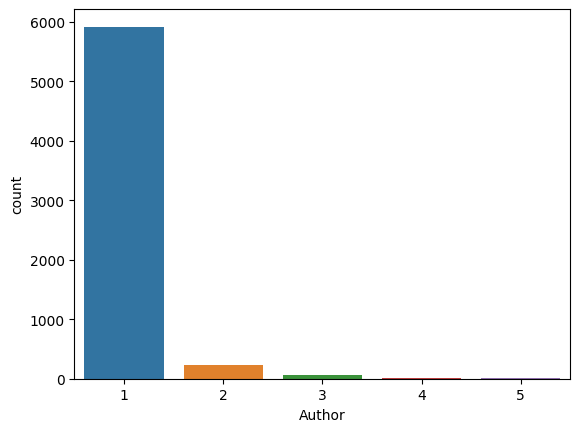

In [30]:
authors = train_data['Author'].copy()

authors['Number_of_authors'] = authors.str.count(',') + 1

ax = sns.countplot(x="Number_of_authors", data=authors)

In [31]:
(authors['Number_of_authors'] == 5).sum()


4

In [32]:
(authors['Number_of_authors'] == 4).sum()


19

In [33]:
(authors['Number_of_authors'] == 3).sum()


58

In [34]:
(authors['Number_of_authors'] == 2).sum()


238

In [35]:
train_data = train_data.drop(['Authors_List','punctuation_chars'], axis=1)

In [36]:
# test_data.columns

In [37]:
train_data.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Set', 'Unnamed: 0', 'Num_Authors'],
      dtype='object')

### Ratings Analysis

In [38]:
train_data['Ratings'] = train_data['Ratings'].str.replace(',', '').str.split(' ').str[0].astype(int)


In [39]:
train_data['Ratings']

0        8
1       14
2        6
3       13
4        1
        ..
6231     2
6232     9
6233     3
6234     4
6235     2
Name: Ratings, Length: 6236, dtype: int64

### Edition Analysis

converting into 4 features: 
1.  type of print 
2.  type of edition
3.  month
4.  year

In [40]:
train_data['Edition']

0       Paperback,– 10 Mar 2016
1        Paperback,– 7 Nov 2012
2       Paperback,– 25 Feb 1982
3        Paperback,– 5 Oct 2017
4       Hardcover,– 10 Oct 2006
                 ...           
6231     Paperback,– 8 Aug 2018
6232    Paperback,– 21 Nov 2016
6233     Paperback,– 8 Jun 2006
6234    Paperback,– 15 Jan 2015
6235    Paperback,– 21 Dec 2016
Name: Edition, Length: 6236, dtype: object

In [41]:
print_type = train_data['Edition'].str.split(',').str[0]
print_type.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada)', 'Product Bundle', 'Library Binding', '(German)',
       'Leather Bound', '(French)', '(Spanish)'], dtype=object)

#### train_data

In [42]:
split_edition_df = train_data["Edition"].str.split(",", n = 1, expand = True)

language_list = []
for item in split_edition_df[0]:
    if '(' in item and ')' in item:
        language_list.append(item)
    else:
        language_list.append('NaN')

language_series = pd.Series(language_list)

print('Total books that include tags: ', len([item for item in language_series if item != 'NaN']))

edition_with_removed_lang_series = train_data["Edition"].copy()
for i, element in enumerate(language_series):
  if element != 'NaN':
    edition_with_removed_lang_series[i] = edition_with_removed_lang_series[i].replace(element+",", "", 1)

Total books that include tags:  4


In [43]:
split_edition_df = edition_with_removed_lang_series.str.split(",", n = 1, expand = True)

print_series = split_edition_df[0]
print_series.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

In [44]:
def remove_punctuations(text):
    punctuations_to_remove = [punctuation for punctuation in string.punctuation if punctuation != ',']
    punctuations_to_remove.append('–')
    for punctuation in ['–']:
        text = text.replace(punctuation, '')
    return text

rest_edition_series = split_edition_df[1].apply(remove_punctuations)

In [45]:
def extract_year(text):
    text = text[-4:]
    return text

year_series = rest_edition_series.apply(extract_year)
year_series.unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'port', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'mile', ' set',
       'tion', '1964', '1984', '1980', 'dged', '1979', 'rint', '1960',
       '1970', '1975', '1905', '1900', 'book', '1961', '1925', '1973'],
      dtype=object)

In [46]:
print('Total non-numeric values: ', (len(year_series) - sum(year_series.str.isnumeric())))
year_series.loc[year_series.str.isnumeric() == False] = 'NaN'

Total non-numeric values:  21


In [47]:
temp_data = []

for i, row in enumerate(rest_edition_series):
  if year_series[i] != 'NaN':
    temp_data.append(row[:-5])
  else:
    temp_data.append(row)

rest_edition_series = pd.Series(temp_data)
rest_edition_series[0:10]

0            10 Mar
1             7 Nov
2            25 Feb
3             5 Oct
4            10 Oct
5             5 May
6             5 Oct
7     Import, 1 Mar
8            15 Dec
9            26 Mar
dtype: object

In [48]:
def extract_month(text):
    text = text[-3:]
    return text

month_series = rest_edition_series.apply(extract_month)
month_series
month_series.unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', '', 'Aug', 'Apr', 'rt,', 'ort', 'TSC', 'on,', 'ile', 'set',
       'ion', 'ed,', 'ged', 'int', 'ook'], dtype=object)

In [49]:
display(month_series.describe())

months = ['Apr','Aug','Dec','Feb', 'Jan', 'Jul','Jun','Mar','May','Nov','Oct','Sep']

count     6236
unique      24
top        Oct
freq       639
dtype: object

In [50]:
month_series.value_counts()

Oct    639
Sep    543
May    537
Jan    514
Jun    501
Nov    487
Apr    469
Jul    457
Mar    455
Aug    446
Feb    410
Dec    408
       341
ort      9
set      5
ed,      4
rt,      3
int      2
TSC      1
on,      1
ile      1
ion      1
ged      1
ook      1
Name: count, dtype: int64

In [51]:
for value in month_series:
  if value not in months:
    month_series = month_series.replace([value],'NaN')

In [52]:
month_series.value_counts()

Oct    639
Sep    543
May    537
Jan    514
Jun    501
Nov    487
Apr    469
Jul    457
Mar    455
Aug    446
Feb    410
Dec    408
NaN    370
Name: count, dtype: int64

In [53]:
temp_data = []

for i, row in enumerate(rest_edition_series):
  if month_series[i] != 'NaN':
    temp_data.append(row[:-4])
  else:
    temp_data.append(row)

rest_edition_series = pd.Series(temp_data)

In [54]:
rest_edition_list = [i.split(",") for i in list(rest_edition_series)]


no_day_lists = []
for a_list in rest_edition_list:
    no_day_list = []
    for item in a_list:
        try:
            int(item)
        except ValueError:
            if item != '':
                no_day_list.append(item.strip())
    no_day_lists.append(no_day_list)    
    
type_series = pd.Series(no_day_lists)
type_series = type_series.apply(lambda y: 'NaN' if (len(y)==0) or (y == [''])   
                                    else ','.join([elem.strip() for elem in y]))

In [55]:
type_series.value_counts()

NaN                                  5451
Import                                614
Illustrated                            46
Unabridged                             18
Special Edition                        18
Student Edition                        13
Box set                                11
International Edition                  10
Abridged                                8
Deckle Edge                             7
Large Print                             6
Illustrated,Import                      5
Abridged,Audiobook,Box set              5
Print                                   3
Audiobook                               3
Large Print,Import                      2
Facsimile                               2
Bargain Price                           1
DVD,NTSC                                1
Import,Facsimile                        1
Abridged,Import                         1
Student Edition,Special Edition         1
Audiobook,Unabridged                    1
Abridged,Audiobook,Large Print    

In [56]:
print_series.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

In [57]:
type_series.unique()

array(['NaN', 'Import', 'Deckle Edge', 'Box set', 'International Edition',
       'Unabridged', 'Special Edition', 'Student Edition', 'Illustrated',
       'Abridged,Import', 'DVD,NTSC', 'Bargain Price', 'Large Print',
       'Abridged', 'Illustrated,Import', 'Audiobook', 'Print',
       'Large Print,Import', 'Import,Facsimile',
       'Abridged,Audiobook,Box set', 'Student Edition,Special Edition',
       'Audiobook,Unabridged', 'Facsimile',
       'Abridged,Audiobook,Large Print', 'Deluxe Edition', 'Kindle eBook',
       'Facsimile,Import', 'Illustrated,Large Print,Audiobook',
       'EveryBook', 'Illustrated,Large Print', 'ADPCM'], dtype=object)

In [58]:
month_series.unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', 'NaN', 'Aug', 'Apr'], dtype=object)

In [59]:
year_series.unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'NaN', '1997', '1995', '1987',
       '1986', '1990', '1988', '1981', '1976', '1994', '1998', '1977',
       '1974', '1983', '1971', '1985', '1978', '1964', '1984', '1980',
       '1979', '1960', '1970', '1975', '1905', '1900', '1961', '1925',
       '1973'], dtype=object)

In [60]:
train_data['Print_Type'] = print_series
train_data['Edition_Type'] = type_series
train_data['Month_Released'] = month_series
train_data['Year_Released'] = year_series

In [61]:
train_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Set,Unnamed: 0,Num_Authors,Print_Type,Edition_Type,Month_Released,Year_Released
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,train,NaN,1,Paperback,NaN,Mar,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train,NaN,1,Paperback,NaN,Nov,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,train,NaN,1,Paperback,NaN,Feb,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train,NaN,1,Paperback,NaN,Oct,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,train,NaN,1,Hardcover,NaN,Oct,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,NaN,test,532.0,1,Paperback,NaN,Aug,2018
6232,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",NaN,test,533.0,1,Paperback,NaN,Nov,2016
6233,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3,'The most refreshing and radiant love story yo...,Romance (Books),Romance,NaN,test,534.0,1,Paperback,NaN,Jun,2006
6234,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,NaN,test,535.0,1,Paperback,NaN,Jan,2015


In [62]:
train_data = train_data.drop(['Edition'], axis=1)

### Reviews Analysis

In [63]:
train_data['Reviews'] = train_data['Reviews'].str.replace(',', '').str.split(' ').str[0].astype(float)

In [64]:
train_data['Reviews']

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6231    5.0
6232    3.3
6233    3.8
6234    3.5
6235    3.9
Name: Reviews, Length: 6236, dtype: float64

In [65]:
test_data['Reviews'] = test_data['Reviews'].str.replace(',', '').str.split(' ').str[0].astype(float)

In [66]:
test_data['Reviews']

0      4.8
1      3.9
2      3.3
3      3.8
4      4.0
      ... 
532    5.0
533    3.3
534    3.8
535    3.5
536    3.9
Name: Reviews, Length: 537, dtype: float64

### Title-Synopsis Analysis

In [67]:
titles_synopses = train_data['Title'] + " " + train_data['Synopsis']
titles_synopses

0       The Prisoner's Gold (The Hunters 3) THE HUNTER...
1       Guru Dutt: A Tragedy in Three Acts A layered p...
2       Leviathan (Penguin Classics) "During the time ...
3       A Pocket Full of Rye (Miss Marple) A handful o...
4       LIFE 70 Years of Extraordinary Photography For...
                              ...                        
6231    Humans: A Brief History of How We F*cked It Al...
6232    The Chemist In this gripping page-turner, an e...
6233    The Duke And I: Number 1 in series (Bridgerton...
6234    Frostfire (Kanin Chronicles) Frostfire by Aman...
6235    The First Order (Sam Capra) Six years ago, Sam...
Length: 6236, dtype: object

In [73]:
if not os.path.exists('titles_synopses_df.csv'):
    translator = Translator()
    translator.raise_Exception = True

    # Initialize the Google API translator
    new_titles_synopses = []
    with tqdm(total=len(titles_synopses), desc="Translating") as pbar:
        for i, synopsis in enumerate(titles_synopses):
            # Using a sleep timer to avoid timeout from Google's API
            time.sleep(0.25)
            # Detect the language
            try:
                detection = translator.detect(synopsis)
                # If language is English with high confidence then don't translate
                if not (detection.lang == "en"):
                    translation = translator.translate(synopsis, dest="en")
                    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
                    new_titles_synopses.append(translation.text)
                else:
                    new_titles_synopses.append(synopsis)
            except Exception as e:
                print(e, "for document", i)
                new_titles_synopses.append(synopsis)

            # Update the tqdm bar in-place
            pbar.update(1)
            pbar.set_postfix({"Processing document": i})
    
    # Calling DataFrame constructor on list
    new_titles_synopses_df = pd.DataFrame(new_titles_synopses)
    new_titles_synopses_df.to_csv('titles_synopses_df.csv', index=False)

else:
    # Else load the translated text from the .csv file
    translated_titles_synopses_df = pd.read_csv('titles_synopses_df.csv')
    translated_titles_synopses_df = translated_titles_synopses_df.rename(columns={'0': 'translated_titles_synopses'})
    print("\nFinal Translated text:")
    print(translated_titles_synopses_df)


Final Translated text:
                             translated_titles_synopses
0     The Prisoner's Gold (The Hunters 3) THE HUNTER...
1     Guru Dutt: A Tragedy in Three Acts A layered p...
2     Leviathan (Penguin Classics) "During the time ...
3     A Pocket Full of Rye (Miss Marple) A handful o...
4     LIFE 70 Years of Extraordinary Photography For...
...                                                 ...
6231  Humans: A Brief History of How We F*cked It Al...
6232  The Chemist In this gripping page-turner, an e...
6233  The Duke And I: Number 1 in series (Bridgerton...
6234  Frostfire (Kanin Chronicles) Frostfire by Aman...
6235  The First Order (Sam Capra) Six years ago, Sam...

[6236 rows x 1 columns]


In [74]:
punctuation = string.punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('english')
ps = nltk.PorterStemmer()
wl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
# Download WordNet using NLTK Downloader
!python3 -m nltk.downloader wordnet
!echo 'yes' | unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_da

In [76]:
def remove_htmltags(html):
    return BeautifulSoup(html).get_text()

def expand_contractions(text):
    return contractions.fix(text)

def remove_punct(text):
    text = "".join([char for char in text if char not in punctuation])
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    text = " ".join([word for word in tokens if word not in stop_words])
    return text 

def lemmatizing(text):
    tokens = word_tokenize(text)
    lemmatized_text=" ".join([wl.lemmatize(word) for word in tokens])
    return lemmatized_text

In [77]:
preprossed_translated_titles_synopses = translated_titles_synopses_df['translated_titles_synopses'].copy()

# Applying text preprocessing
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_htmltags(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_punct(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: expand_contractions(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_stopwords(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: lemmatizing(l))

preprossed_translated_titles_synopses

/tmp/ipykernel_47/400682723.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(html).get_text()


0       prisoner gold hunter 3 hunter return third bri...
1       guru dutt tragedy three act layered portrait t...
2       leviathan penguin classic time men live withou...
3       pocket full rye miss marple handful grain foun...
4       life 70 year extraordinary photography seven d...
                              ...                        
6231    human brief history fcked fcking brilliant sar...
6232    chemist gripping pageturner exagent run former...
6233    duke number 1 series bridgerton family refresh...
6234    frostfire kanin chronicle frostfire amanda hoc...
6235    first order sam capra six year ago sam capra w...
Name: translated_titles_synopses, Length: 6236, dtype: object

In [78]:
tfidf_vec = TfidfVectorizer(use_idf=True, norm='l2',ngram_range=(1, 1), max_df=0.9, min_df=0.001)
tfidf_text = tfidf_vec.fit_transform(preprossed_translated_titles_synopses)
print('TF-IDF output shape:', tfidf_text.shape)

# n_components is the number of topics
lda_model = LatentDirichletAllocation(n_components=25, random_state=420)
lda_top = lda_model.fit_transform(tfidf_text)
print(lda_top.shape) 
print('LDA output shape:', lda_top.shape)
print("Final perplexity score on document set: ", lda_model.bound_)

TF-IDF output shape: (6236, 8895)
(6236, 25)
LDA output shape: (6236, 25)
Final perplexity score on document set:  54535.7456126702


In [79]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.5412333625654232 %
Topic  1 :  0.5412333625086333 %
Topic  2 :  0.5412333625092057 %
Topic  3 :  0.5412333625066051 %
Topic  4 :  0.5412333625451285 %
Topic  5 :  0.5412333625757934 %
Topic  6 :  0.5412333625391512 %
Topic  7 :  57.018403851636265 %
Topic  8 :  0.5412333625066051 %
Topic  9 :  0.5412333625071927 %
Topic  10 :  0.5412333625075268 %
Topic  11 :  0.5412333625240732 %
Topic  12 :  0.5412333625443222 %
Topic  13 :  0.5412333625758067 %
Topic  14 :  0.5412333625066051 %
Topic  15 :  0.5412333625430257 %
Topic  16 :  0.5412333625123839 %
Topic  17 :  0.5412333625101543 %
Topic  18 :  0.5412333625066051 %
Topic  19 :  0.5412333625087037 %
Topic  20 :  0.5412333625205131 %
Topic  21 :  30.533228810316444 %
Topic  22 :  0.5412333625080195 %
Topic  23 :  0.5412333625066051 %
Topic  24 :  0.5412333625092065 %


In [80]:
topics_df = pd.DataFrame(lda_top, columns=["Topic " + i.__str__() for i in range(lda_top.shape[1])])
topics_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.570184,0.005412,0.005412,...,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.305332,0.005412,0.005412,0.005412
1,0.005262,0.005262,0.005262,0.005262,0.005262,0.005262,0.005262,0.223644,0.005262,0.005262,...,0.005262,0.005262,0.005262,0.005262,0.005262,0.127374,0.234603,0.005262,0.005262,0.005262
2,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,...,0.003753,0.175111,0.003753,0.003753,0.003753,0.003753,0.485618,0.003753,0.003753,0.003753
3,0.006725,0.006725,0.006725,0.086879,0.006725,0.006725,0.006725,0.358296,0.006725,0.006725,...,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725
4,0.252130,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410,0.448738,0.005410,0.005410,...,0.005410,0.005410,0.005410,0.099201,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0.101001,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.485980,0.003968,0.003968,...,0.003968,0.003968,0.016399,0.029518,0.003968,0.003968,0.209353,0.003968,0.003968,0.003968
6232,0.083336,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.663321,0.003961,0.003961,...,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961
6233,0.047188,0.004176,0.004176,0.004176,0.016869,0.004176,0.048569,0.573381,0.017904,0.004176,...,0.004176,0.004176,0.004176,0.004176,0.004176,0.004176,0.216754,0.004176,0.004176,0.004176
6234,0.126559,0.004540,0.004540,0.004540,0.004540,0.004540,0.004540,0.551243,0.004540,0.004540,...,0.004540,0.004540,0.060210,0.004540,0.004540,0.004540,0.166643,0.004540,0.004540,0.004540


In [81]:
train_data = pd.concat([train_data, topics_df], axis=1)

In [82]:
train_data

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Set,Unnamed: 0,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,train,NaN,...,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.305332,0.005412,0.005412,0.005412
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train,NaN,...,0.005262,0.005262,0.005262,0.005262,0.005262,0.127374,0.234603,0.005262,0.005262,0.005262
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,train,NaN,...,0.003753,0.175111,0.003753,0.003753,0.003753,0.003753,0.485618,0.003753,0.003753,0.003753
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train,NaN,...,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,train,NaN,...,0.005410,0.005410,0.005410,0.099201,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,5.0,2,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,NaN,test,532.0,...,0.003968,0.003968,0.016399,0.029518,0.003968,0.003968,0.209353,0.003968,0.003968,0.003968
6232,The Chemist,Stephenie Meyer,3.3,9,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",NaN,test,533.0,...,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961
6233,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,3.8,3,'The most refreshing and radiant love story yo...,Romance (Books),Romance,NaN,test,534.0,...,0.004176,0.004176,0.004176,0.004176,0.004176,0.004176,0.216754,0.004176,0.004176,0.004176
6234,Frostfire (Kanin Chronicles),Amanda Hocking,3.5,4,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,NaN,test,535.0,...,0.004540,0.004540,0.060210,0.004540,0.004540,0.004540,0.166643,0.004540,0.004540,0.004540


### Popularity column

In [83]:
train_data['Popularity'] = train_data['Reviews'] * train_data['Ratings']

In [84]:
train_data.columns

Index(['Title', 'Author', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Set', 'Unnamed: 0', 'Num_Authors',
       'Print_Type', 'Edition_Type', 'Month_Released', 'Year_Released',
       'Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5',
       'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11',
       'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17',
       'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23',
       'Topic 24', 'Popularity'],
      dtype='object')

### Season Column

In [85]:
train_data['Month_Released'].unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', 'NaN', 'Aug', 'Apr'], dtype=object)

In [86]:
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'



In [87]:
train_data['Season_Released'] = train_data['Month_Released'].apply(get_season)

# Duplicate rows

In [88]:
duplicate_rows = train_data[train_data.duplicated()]
duplicate_rows

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Set,Unnamed: 0,...,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Popularity,Season_Released


# Filling null values 

In [89]:
train_data.columns

Index(['Title', 'Author', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Set', 'Unnamed: 0', 'Num_Authors',
       'Print_Type', 'Edition_Type', 'Month_Released', 'Year_Released',
       'Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5',
       'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11',
       'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17',
       'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23',
       'Topic 24', 'Popularity', 'Season_Released'],
      dtype='object')

In [90]:
train_data['Title'] = train_data['Title'].replace('NaN', np.NaN)
train_data['Author'] = train_data['Author'].replace('NaN', np.NaN)
train_data['Reviews'] = train_data['Reviews'].replace('NaN', np.NaN)
train_data['Ratings'] = train_data['Ratings'].replace('NaN', np.NaN)
train_data['Genre'] = train_data['Genre'].replace('NaN', np.NaN)
train_data['BookCategory'] = train_data['BookCategory'].replace('NaN', np.NaN)
train_data['Price'] = train_data['Price'].replace('NaN', np.NaN)
train_data['Num_Authors'] = train_data['Num_Authors'].replace('NaN', np.NaN)
train_data['Print_Type'] = train_data['Print_Type'].replace('NaN', np.NaN)
train_data['Edition_Type'] = train_data['Edition_Type'].replace('NaN', np.NaN)
train_data['Month_Released'] = train_data['Month_Released'].replace('NaN', np.NaN)
train_data['Year_Released'] = train_data['Year_Released'].replace('NaN', np.NaN)
train_data['Season_Released'] = train_data['Season_Released'].replace('NaN', np.NaN)
train_data['Popularity'] = train_data['Popularity'].replace('NaN', np.NaN)



In [91]:
train_data.isnull().sum()

Title                 0
Author                0
Reviews               0
Ratings               0
Synopsis              0
Genre                 0
BookCategory          0
Price               537
Set                   0
Unnamed: 0         5699
Num_Authors           0
Print_Type            0
Edition_Type       5451
Month_Released      370
Year_Released        21
Topic 0               0
Topic 1               0
Topic 2               0
Topic 3               0
Topic 4               0
Topic 5               0
Topic 6               0
Topic 7               0
Topic 8               0
Topic 9               0
Topic 10              0
Topic 11              0
Topic 12              0
Topic 13              0
Topic 14              0
Topic 15              0
Topic 16              0
Topic 17              0
Topic 18              0
Topic 19              0
Topic 20              0
Topic 21              0
Topic 22              0
Topic 23              0
Topic 24              0
Popularity            0
Season_Released 

In [92]:
for col in train_data.select_dtypes(include='object').columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

In [93]:
train_data.isnull().sum()

Title                 0
Author                0
Reviews               0
Ratings               0
Synopsis              0
Genre                 0
BookCategory          0
Price               537
Set                   0
Unnamed: 0         5699
Num_Authors           0
Print_Type            0
Edition_Type          0
Month_Released        0
Year_Released         0
Topic 0               0
Topic 1               0
Topic 2               0
Topic 3               0
Topic 4               0
Topic 5               0
Topic 6               0
Topic 7               0
Topic 8               0
Topic 9               0
Topic 10              0
Topic 11              0
Topic 12              0
Topic 13              0
Topic 14              0
Topic 15              0
Topic 16              0
Topic 17              0
Topic 18              0
Topic 19              0
Topic 20              0
Topic 21              0
Topic 22              0
Topic 23              0
Topic 24              0
Popularity            0
Season_Released 

# EDA & Visualisation

In [94]:
train_data['Year_Released'] = train_data['Year_Released'].astype(int)


In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            6236 non-null   object 
 1   Author           6236 non-null   object 
 2   Reviews          6236 non-null   float64
 3   Ratings          6236 non-null   int64  
 4   Synopsis         6236 non-null   object 
 5   Genre            6236 non-null   object 
 6   BookCategory     6236 non-null   object 
 7   Price            5699 non-null   float64
 8   Set              6236 non-null   object 
 9   Unnamed: 0       537 non-null    float64
 10  Num_Authors      6236 non-null   int64  
 11  Print_Type       6236 non-null   object 
 12  Edition_Type     6236 non-null   object 
 13  Month_Released   6236 non-null   object 
 14  Year_Released    6236 non-null   int64  
 15  Topic 0          6236 non-null   float64
 16  Topic 1          6236 non-null   float64
 17  Topic 2       

In [96]:
train_data = train_data.drop(['Title', 'Synopsis', ], axis=1)

In [97]:
numerical_columns = ['Reviews', 'Ratings', 'Popularity']

### Normalization

In [98]:
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

In [99]:
preprossed_train_data = train_data.copy()

### Visulization

#### Barplots for numerical features

In [100]:
preprossed_train_data.columns

Index(['Author', 'Reviews', 'Ratings', 'Genre', 'BookCategory', 'Price', 'Set',
       'Unnamed: 0', 'Num_Authors', 'Print_Type', 'Edition_Type',
       'Month_Released', 'Year_Released', 'Topic 0', 'Topic 1', 'Topic 2',
       'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8',
       'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14',
       'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20',
       'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24', 'Popularity',
       'Season_Released'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


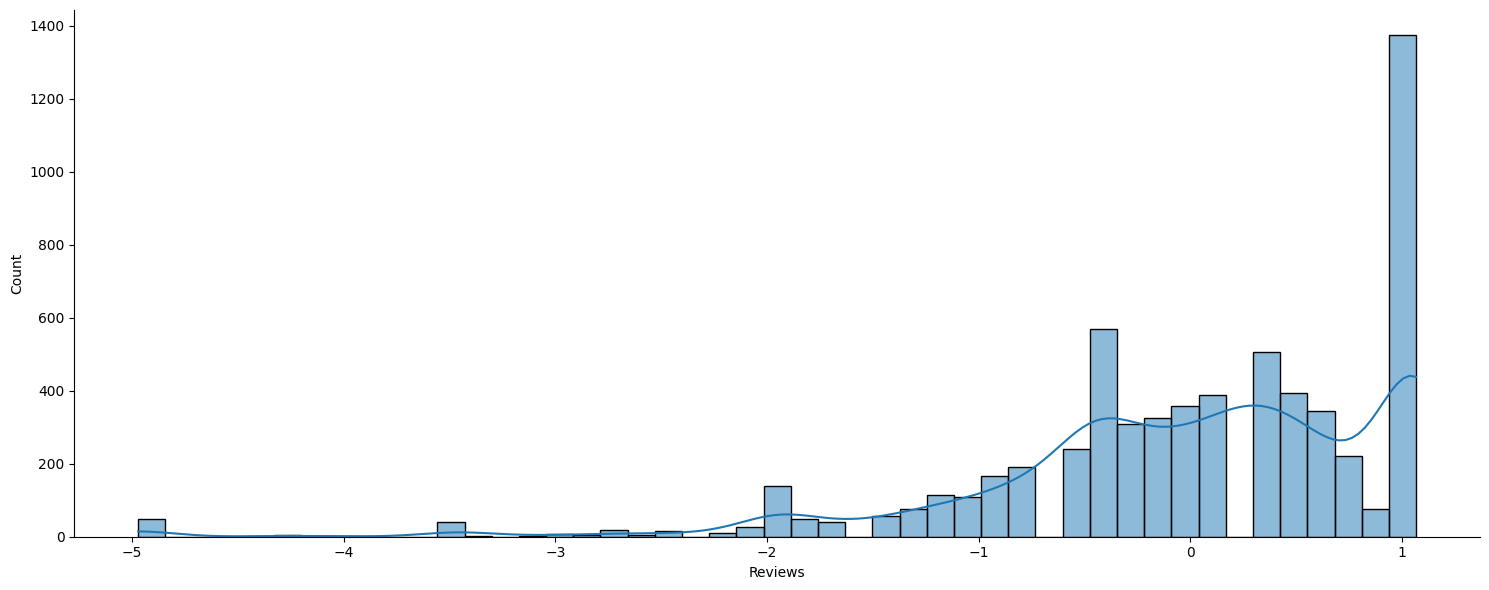

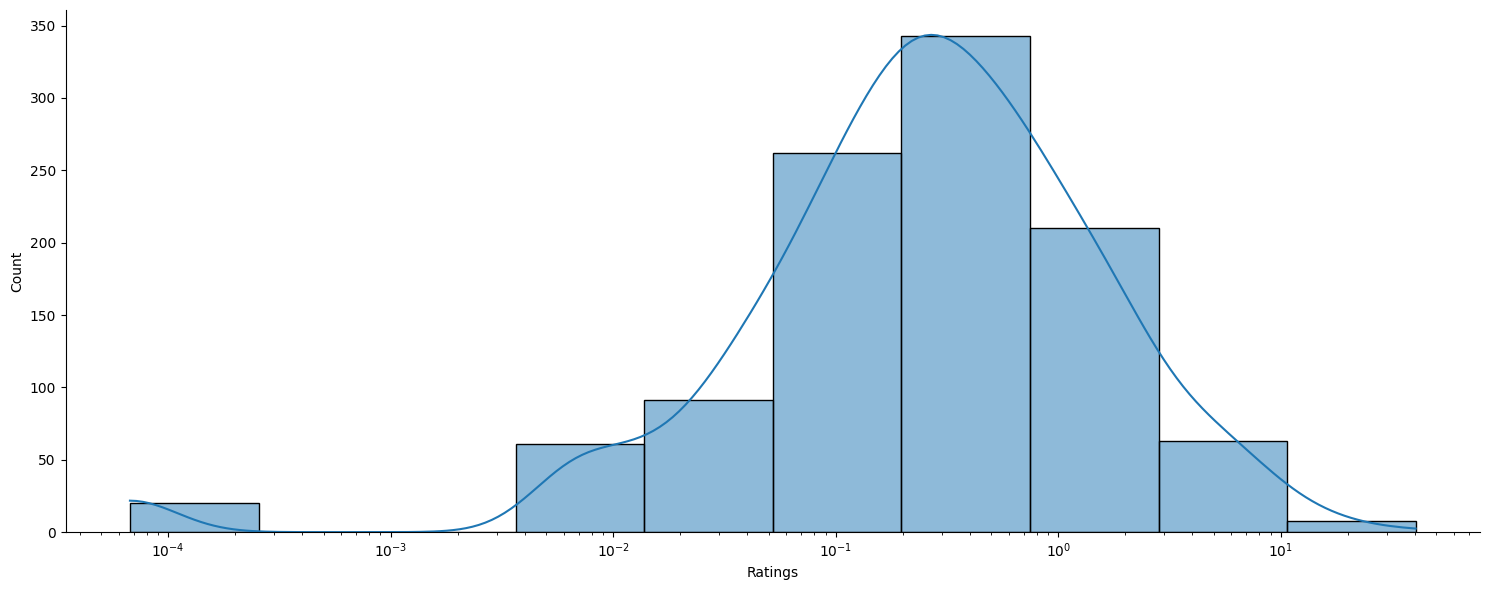

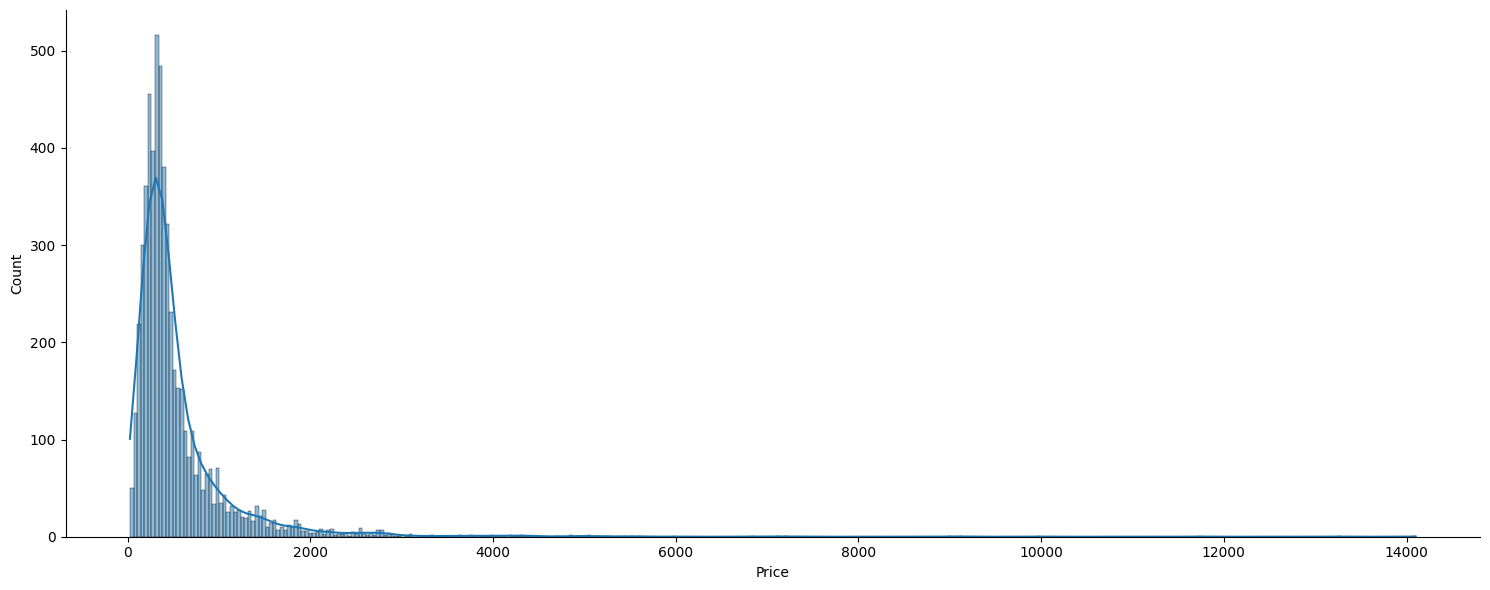

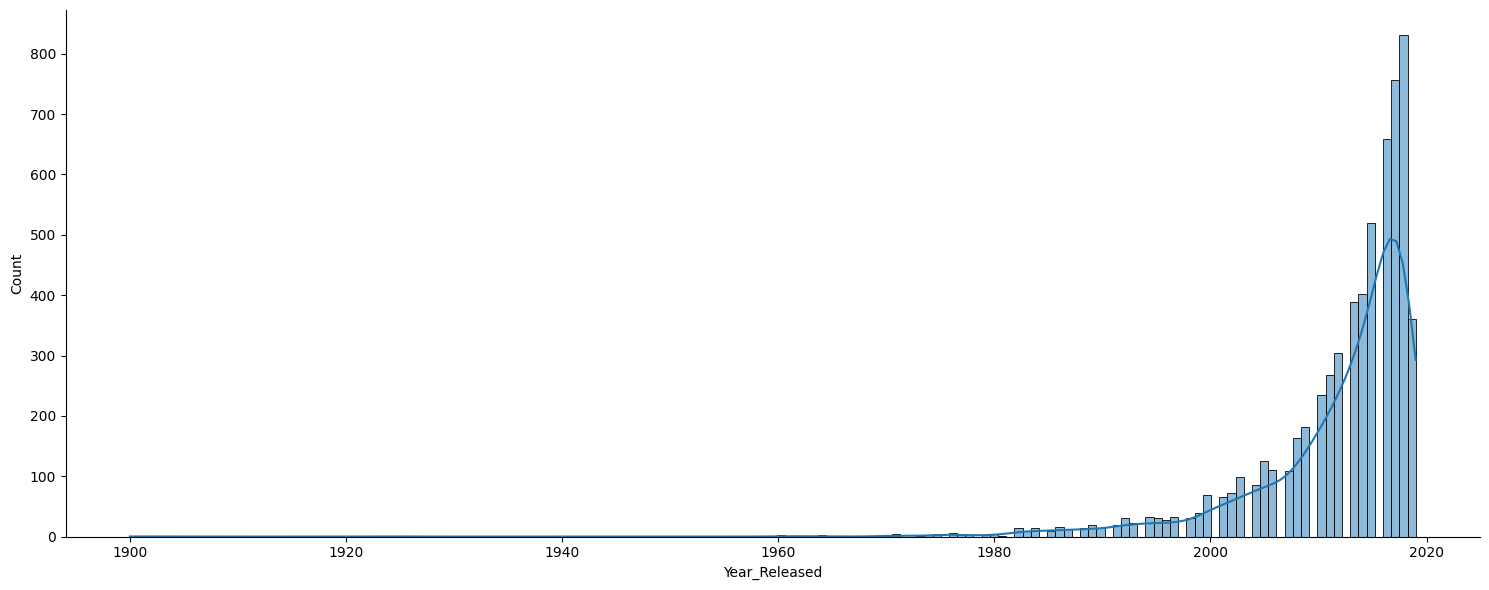

In [101]:
sns.displot(data=preprossed_train_data, x="Reviews", kde=True, height=6,aspect=2.5)
ax=sns.displot(data=preprossed_train_data, x="Ratings", bins=10, kde=True, log_scale=True,height=6,aspect=2.5)
ax.set(xlabel='Ratings', ylabel='Count')
sns.displot(data=preprossed_train_data, x="Price", kde=True,height=6,aspect=2.5)
sns.displot(data=preprossed_train_data, x="Year_Released", kde=True,height=6,aspect=2.5)
plt.show()

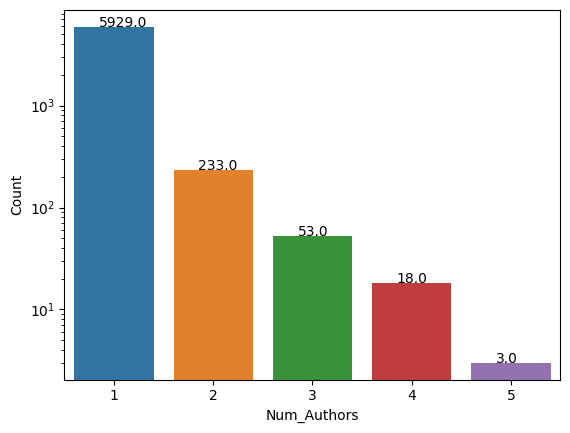

In [102]:
ax = sns.countplot(data=preprossed_train_data, x="Num_Authors")
ax.set_yscale("log")
ax.set(ylabel='Count')

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Boxplot for numerical features

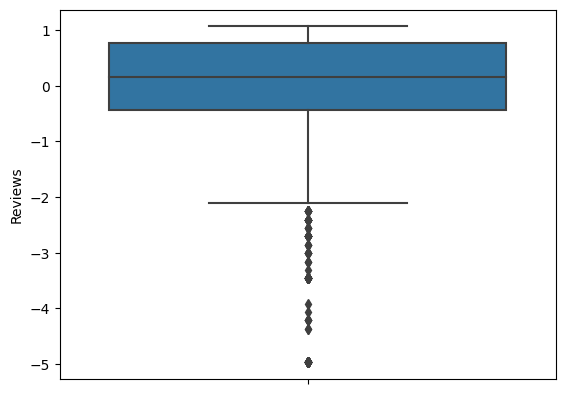

In [103]:
sns.boxplot(data=preprossed_train_data, y='Reviews')
plt.show()

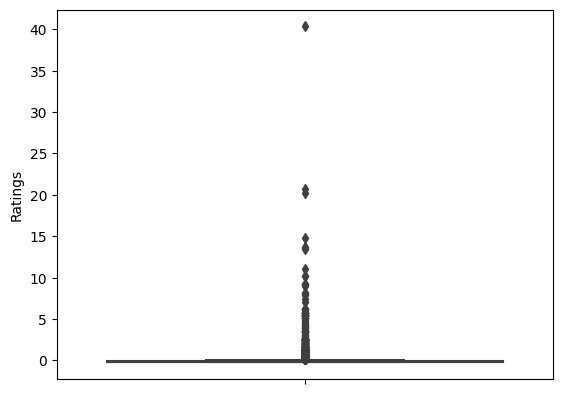

In [104]:
sns.boxplot(data=preprossed_train_data, y='Ratings')
plt.ylabel('Ratings') 
plt.show()

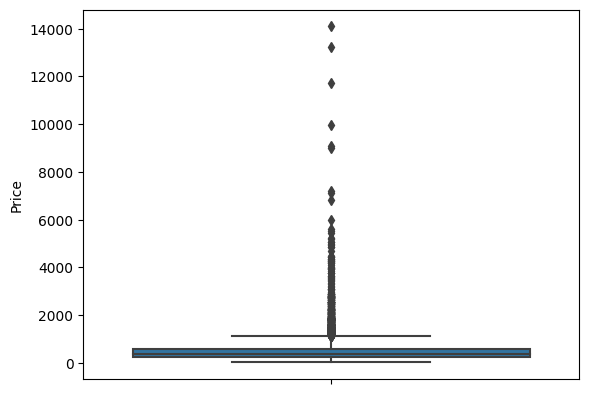

In [105]:
sns.boxplot(data=preprossed_train_data, y='Price')
plt.show()

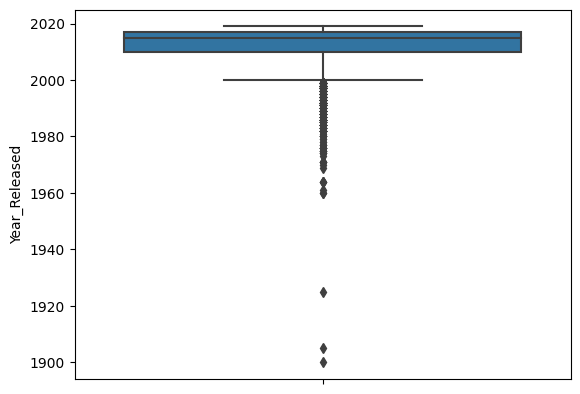

In [106]:
sns.boxplot(data=preprossed_train_data, y='Year_Released')
plt.show()

#### Price and Month

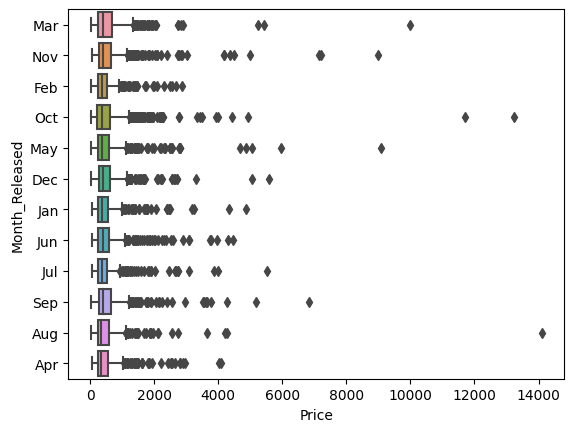

In [107]:
sns.boxplot(data=preprossed_train_data,x="Price",y='Month_Released')
plt.show()

#### Ratings , Reviews, Year, Nomber of Authors & Price

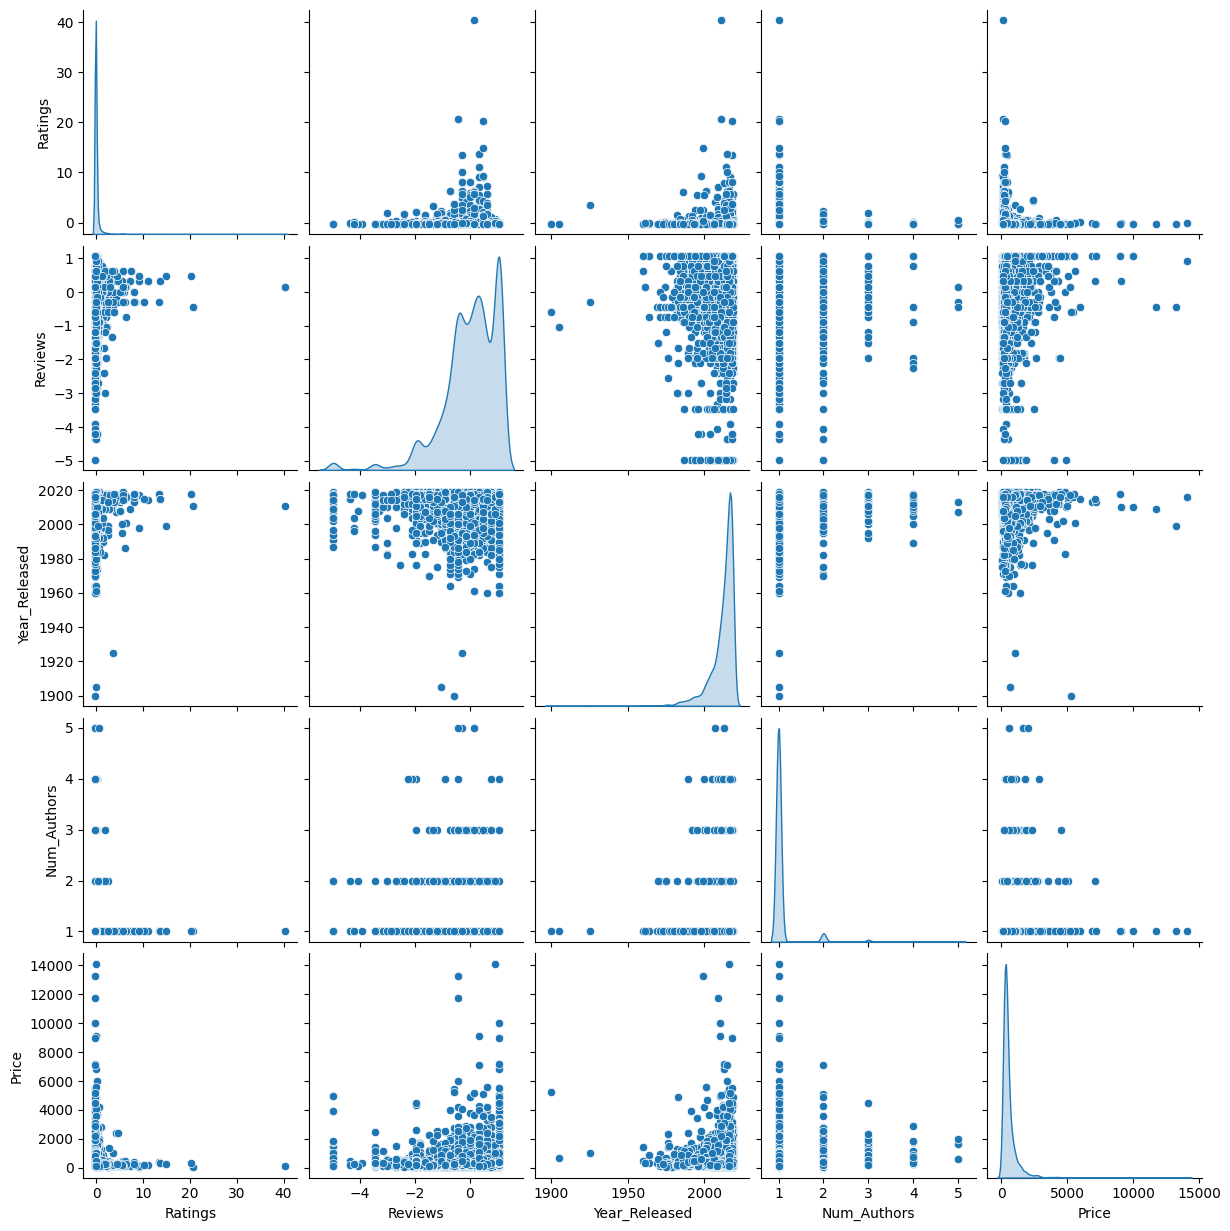

In [108]:
numerical_df= preprossed_train_data[['Ratings', 'Reviews','Year_Released','Num_Authors','Price']]
sns.pairplot(numerical_df, diag_kind= 'kde')

#### Month & Price

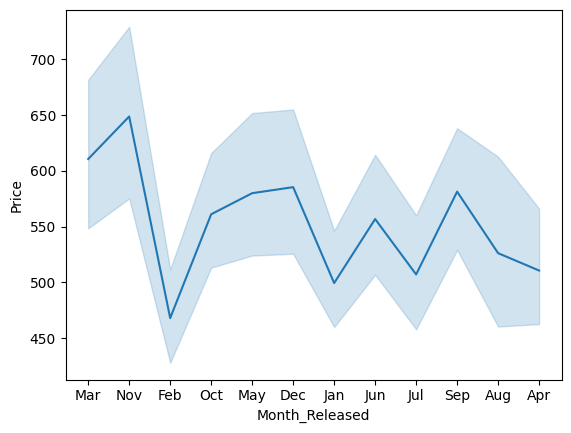

In [109]:
sns.lineplot(x="Month_Released",y="Price",data = preprossed_train_data)
plt.show()

#### Year & Price

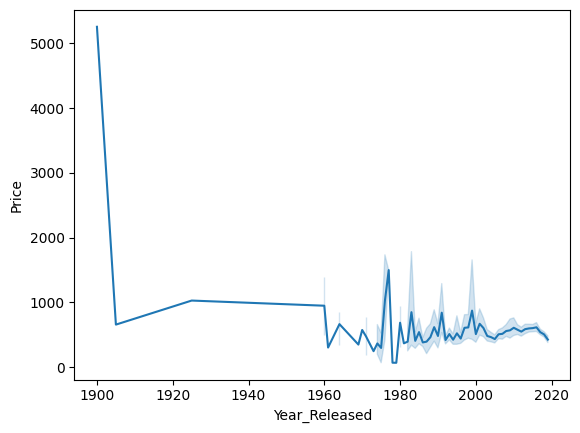

In [110]:
sns.lineplot(data=preprossed_train_data, x = "Year_Released" , y ="Price")
plt.show()

#### Barplots for Price and Categorical Features

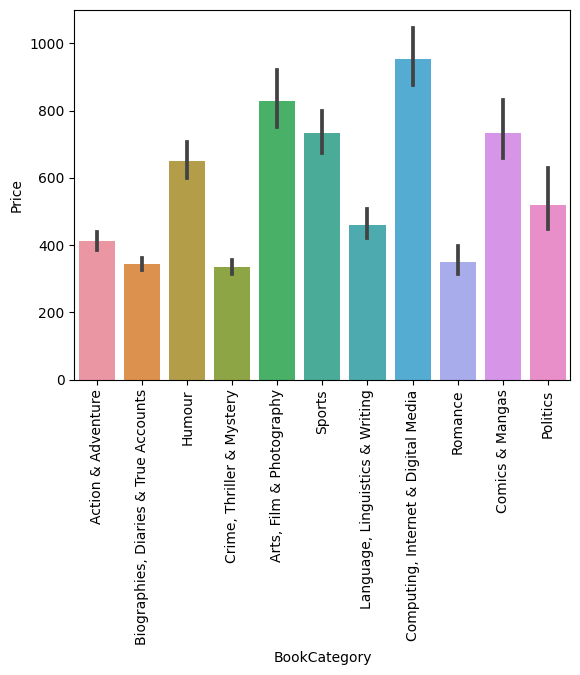

In [111]:
sns.barplot(data=preprossed_train_data, x="BookCategory",y='Price')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


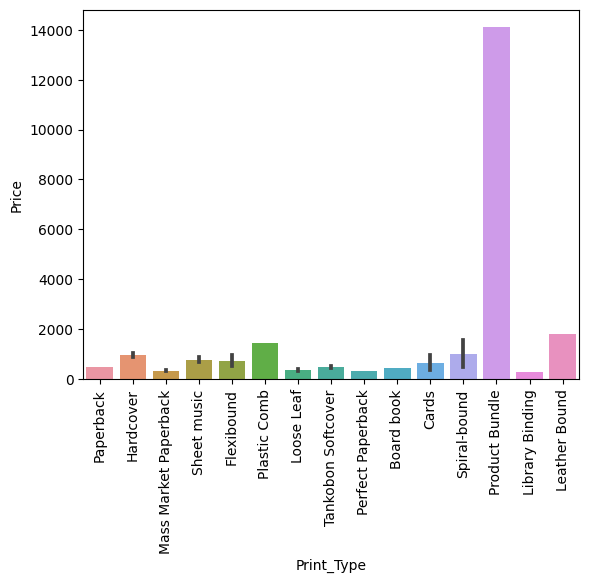

In [112]:
sns.barplot(data=preprossed_train_data, x="Print_Type",y='Price')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


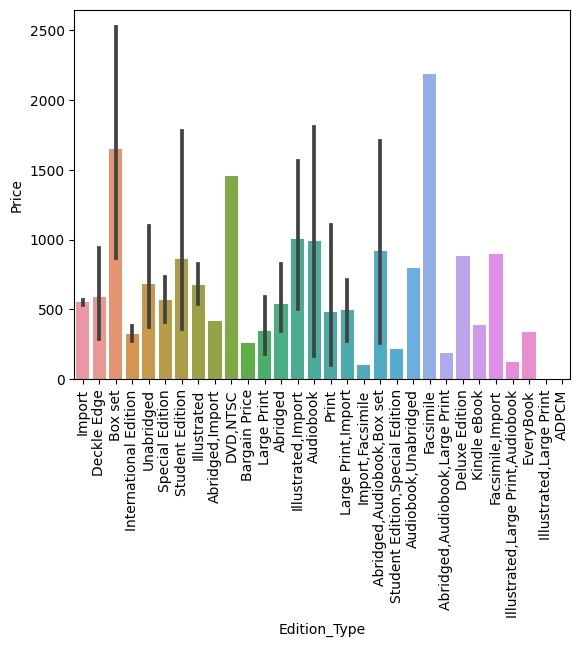

In [113]:
sns.barplot(data=preprossed_train_data, x="Edition_Type",y='Price')
plt.xticks(rotation=90)
plt.show()

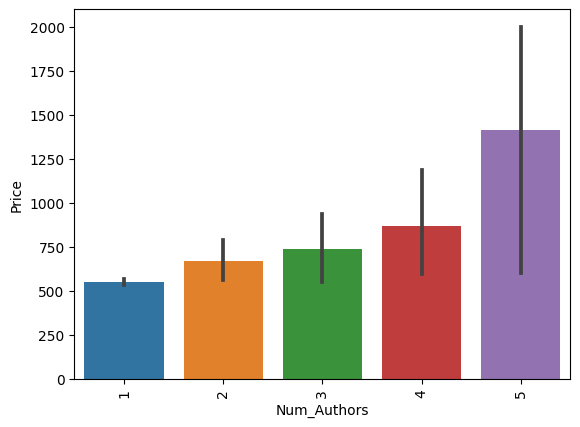

In [114]:
sns.barplot(data=preprossed_train_data, x="Num_Authors", y='Price')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


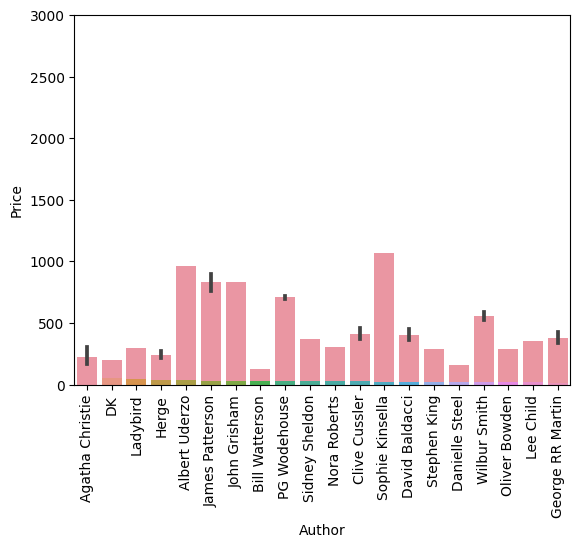

In [115]:
sns.barplot(data=preprossed_train_data, x="Author", y='Price')
plt.xticks(rotation=90)

author_counts = preprossed_train_data["Author"].value_counts().iloc[:20]
author_counts_df = pd.DataFrame({'Author': author_counts.index, 'Count': author_counts.values})
sns.barplot(data=author_counts_df, x='Author', y='Count', order=author_counts.index)

plt.ylim(0, 3000)
plt.ylabel("Price")
plt.show()

### Correlation Matrix

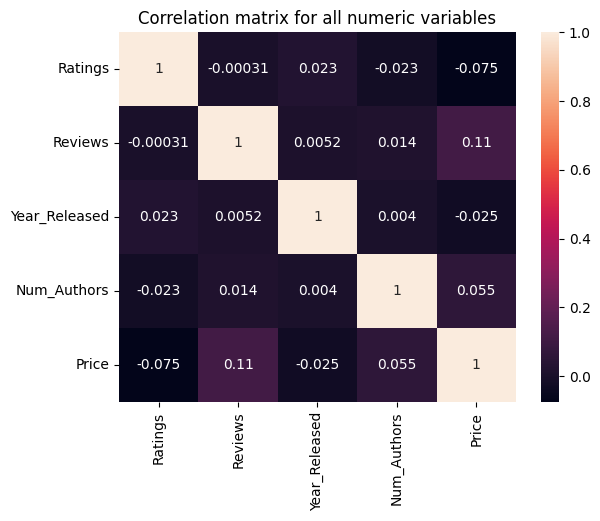

In [116]:
hm=sns.heatmap(data=numerical_df.corr(),annot = True)
hm.set( title = "Correlation matrix for all numeric variables")

plt.show()

### One-Hot encoding

In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Author           6236 non-null   object 
 1   Reviews          6236 non-null   float64
 2   Ratings          6236 non-null   float64
 3   Genre            6236 non-null   object 
 4   BookCategory     6236 non-null   object 
 5   Price            5699 non-null   float64
 6   Set              6236 non-null   object 
 7   Unnamed: 0       537 non-null    float64
 8   Num_Authors      6236 non-null   int64  
 9   Print_Type       6236 non-null   object 
 10  Edition_Type     6236 non-null   object 
 11  Month_Released   6236 non-null   object 
 12  Year_Released    6236 non-null   int64  
 13  Topic 0          6236 non-null   float64
 14  Topic 1          6236 non-null   float64
 15  Topic 2          6236 non-null   float64
 16  Topic 3          6236 non-null   float64
 17  Topic 4       

In [118]:
train_data['Topic 23']

0       0.005412
1       0.005262
2       0.003753
3       0.006725
4       0.005410
          ...   
6231    0.003968
6232    0.003961
6233    0.004176
6234    0.004540
6235    0.005354
Name: Topic 23, Length: 6236, dtype: float64

In [119]:
train_data = pd.get_dummies(train_data, columns=['Author', 'Genre', 'BookCategory', 'Print_Type', 
                      'Edition_Type', 'Month_Released',
                      'Season_Released'])


In [120]:
len(train_data.columns)

4114

# Modeling

### splitting dataset 

In [121]:
train_data.columns

Index(['Reviews', 'Ratings', 'Price', 'Set', 'Unnamed: 0', 'Num_Authors',
       'Year_Released', 'Topic 0', 'Topic 1', 'Topic 2',
       ...
       'Month_Released_Jun', 'Month_Released_Mar', 'Month_Released_May',
       'Month_Released_Nov', 'Month_Released_Oct', 'Month_Released_Sep',
       'Season_Released_Fall', 'Season_Released_Spring',
       'Season_Released_Summer', 'Season_Released_Winter'],
      dtype='object', length=4114)

In [122]:
train_data = train_data[train_data['Set'] == 'train']

X = train_data.drop(['Set', 'Price', 'Unnamed: 0'], axis=1)
y = train_data['Price']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [123]:
def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)
    
    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return mse_train, mse_test, random_forest_regressor

In [124]:
mse_train, mse_test, random_forest_regressor = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 53776.4060780031 // Test mse is: 204610.06202799274


# Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.

### R-Squered Value

In [125]:
y_pred_train = random_forest_regressor.predict(X_train)
y_pred_test = random_forest_regressor.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R-squared for training set: {:.4f}".format(r2_train))
print("R-squared for test set: {:.4f}".format(r2_test))

R-squared for training set: 0.8869
R-squared for test set: 0.2350


This will give you an idea of how well your regression model is performing on both the training and test sets. If R-squared is close to 1, it indicates a good fit, and if it's close to 0, the model is not explaining much of the variance. Keep in mind that interpretation of these metrics depends on the specific characteristics of your data and the problem you're trying to solve.

### Feature Importance

In [126]:
feature_importances = random_forest_regressor.feature_importances_
feature_importances

array([0.02331716, 0.0168298 , 0.00169473, ..., 0.00209252, 0.0021372 ,
       0.0011149 ])

Index(['Topic 4', 'Author_Ronald G Ehrenberg',
       'Author_Design Museum Enterprise Limited', 'Print_Type_Hardcover',
       'Topic 13', 'Author_BN Goswamy', 'Author_Rene Goscinny',
       'Print_Type_Product Bundle', 'Reviews', 'Author_Victoria Holt'],
      dtype='object')


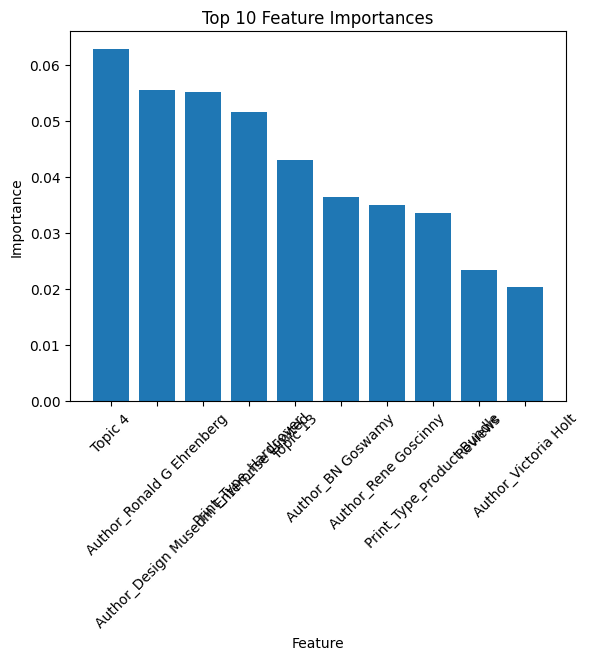

In [127]:
feature_names = X_train.columns  

# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]

print(feature_names[sorted_idx][:10])
# Plotting the top N features
top_n = 10
plt.bar(range(top_n), feature_importances[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top {} Feature Importances".format(top_n))
plt.show()

### Residual Analysis

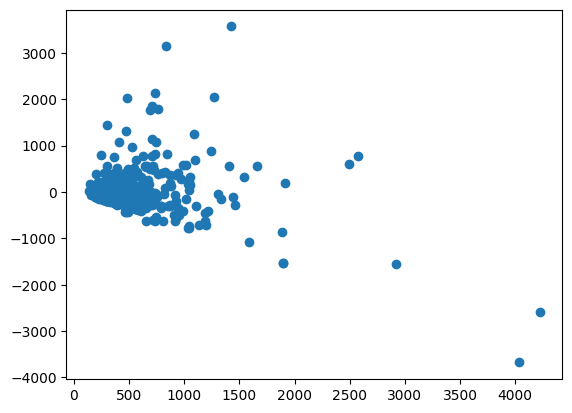

In [133]:
y_pred = random_forest_regressor.predict(X_test)

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)